In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading the data
df = pd.read_csv("test_df.csv")
preds_df = pd.read_csv("predictions.csv")

df = df.merge(
    preds_df[["transaction_id", "score", "prediction"]],
    on="transaction_id",
    how="left"
)


In [3]:
tx_id = 111666

features = [
    "trans_date_trans_time",
    "is_fraud",
    "prediction", "score", 

    # Transaction features
    "amt",
    "hour",
    "is_night_tx",
    "dayofweek",
    "is_weekend",
    "age",
    "is_new_merchant",
    "card_time_since_prev_tx",
    "dist_from_prev_tx",
    "dist_from_home",
    "is_impossible_travel",
    "category_idx",
    "is_category_shift",

    # Card features
    "amt_zscore",
    "amt_vs_card_mean_ratio",
    "amt_minus_prev_max",
    "amt_minus_prev_min",
    "card_amt_mean",
    "card_amt_std",
    "tx_count_1h",
    "tx_count_24h",
    "amt_sum_1h",
    
    # Identity
    "gender_idx", "job_idx",
    "city_pop",

    # Mercahnt feature
    "merchant_avg_amt",
    "merchant_time_since_prev_tx",
    "amt_vs_merchant_avg_ratio",
]

df.loc[df["transaction_id"] == tx_id, features].iloc[0].to_frame("value")

,value
trans_date_trans_time,2020-07-30 01:22:08
is_fraud,1
prediction,0
score,0.689835
amt,291.8
hour,1
is_night_tx,1
dayofweek,3
is_weekend,0
age,26.817248


In [4]:
row_fn = df.loc[df["transaction_id"] == tx_id].iloc[0]
card_id = row_fn["card_id"]
fraud_time = row_fn["unix_trans_time"]

# Keep only past transactions
card_tx = (
    df[
        (df["card_id"] == card_id) &
        (df["unix_trans_time"] < fraud_time)
    ]
    .sort_values("unix_trans_time")[features]
)

pd.set_option('display.max_columns', None)
card_tx

,trans_date_trans_time,is_fraud,prediction,score,amt,hour,is_night_tx,dayofweek,is_weekend,age,is_new_merchant,card_time_since_prev_tx,dist_from_prev_tx,dist_from_home,is_impossible_travel,category_idx,is_category_shift,amt_zscore,amt_vs_card_mean_ratio,amt_minus_prev_max,amt_minus_prev_min,card_amt_mean,card_amt_std,tx_count_1h,tx_count_24h,amt_sum_1h,gender_idx,job_idx,city_pop,merchant_avg_amt,merchant_time_since_prev_tx,amt_vs_merchant_avg_ratio
0,2020-06-21 15:41:32,0,0,0.691289,42.32,15,0,6,1,26.710472,1,3600.0,0.000000,70.573851,0,7,0,0.000000,1.000000,42.32,42.32,0.000000,0.000000,0.0,0.0,0.00,1,270,1504,62.795612,3600.0,0.673932
1,2020-06-21 17:33:11,0,0,0.690493,60.11,17,0,6,1,26.710472,1,6699.0,27.744558,81.140257,0,6,1,0.000000,1.420369,17.79,17.79,42.320000,0.000000,1.0,1.0,42.32,1,270,1504,93.416667,5812.0,0.643461
2,2020-06-21 18:15:55,0,0,0.689832,549.72,18,0,6,1,26.710472,1,2564.0,138.425153,84.649984,0,13,1,39.628582,10.733574,489.61,507.40,51.215000,12.579430,1.0,2.0,60.11,1,270,1504,62.666899,3600.0,8.772095
3,2020-06-21 20:49:21,0,0,0.689978,58.76,20,0,6,1,26.710472,1,9206.0,147.797254,87.823959,0,1,1,-0.550872,0.270306,-490.96,16.44,217.383333,287.949416,2.0,3.0,609.83,1,270,1504,45.374000,1375.0,1.295015
4,2020-06-21 22:08:56,0,0,0.689891,66.89,22,0,6,1,26.710472,1,4775.0,28.152449,103.643562,0,1,0,-0.446697,0.376363,-482.83,24.57,177.727500,248.126818,1.0,4.0,58.76,1,270,1504,20.870000,34152.0,3.205079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020-07-29 13:56:54,0,0,0.689953,60.39,13,0,2,0,26.814511,1,16062.0,137.522505,65.707985,0,1,1,-0.402165,0.595656,-507.07,33.16,101.384033,101.933279,1.0,6.0,91.43,1,270,1504,52.866752,42990.0,1.142306
182,2020-07-29 20:41:02,0,0,0.689921,82.96,20,0,2,0,26.814511,1,24248.0,154.404687,95.020959,0,0,1,-0.178952,0.820097,-484.50,55.73,101.158791,101.696713,1.0,6.0,60.39,1,270,1504,57.889801,4246.0,1.433068
183,2020-07-29 22:39:23,0,0,0.689914,75.61,22,0,2,0,26.814511,0,7101.0,93.837701,25.954627,0,6,1,-0.250916,0.748174,-491.85,48.38,101.059344,101.425864,1.0,7.0,82.96,1,270,1504,58.727315,9852.0,1.287476
184,2020-07-29 23:34:10,0,0,0.689860,42.13,23,0,2,0,26.814511,0,3287.0,95.139067,82.813549,0,7,1,-0.581136,0.417455,-525.33,14.90,100.921033,101.165763,1.0,6.0,75.61,1,270,1504,56.958103,85541.0,0.739666


In [5]:
# Total transactions
total_tx = card_tx.shape[0]

# Number of frauds
num_fraud = card_tx["is_fraud"].sum()

# Percentage
perc_fraud = (num_fraud / total_tx) * 100

print(f"Percentage of fraud transactions: {perc_fraud:.2f}%")


Percentage of fraud transactions: 0.54%


In [6]:
# Last transaction (fraud)
fn_tx = row_fn

# Compute historical stats
hist_stats = card_tx[[
    "amt", "amt_zscore", "amt_minus_prev_max", "amt_minus_prev_min", "card_time_since_prev_tx", "dist_from_prev_tx", "dist_from_home","merchant_avg_amt", "merchant_time_since_prev_tx"
]].describe().T

# Add the FN transaction value
hist_stats["fn_tx"] = [
    fn_tx["amt"],
    fn_tx["amt_zscore"],
    fn_tx["amt_minus_prev_max"],
    fn_tx["amt_minus_prev_min"],
    fn_tx["card_time_since_prev_tx"],
    fn_tx["dist_from_prev_tx"],
    fn_tx["dist_from_home"],
    fn_tx["merchant_avg_amt"],
    fn_tx["merchant_time_since_prev_tx"]
]

hist_stats

,count,mean,std,min,25%,50%,75%,max,fn_tx
amt,186.0,100.122634,100.922810,11.210000,60.255000,75.830000,95.957500,567.460000,291.800000
amt_zscore,186.0,0.152130,3.044301,-0.885230,-0.410833,-0.258739,-0.071143,39.628582,1.899247
amt_minus_prev_max,186.0,-443.856774,127.773777,-556.250000,-490.325000,-475.325000,-453.762500,489.610000,-275.660000
amt_minus_prev_min,186.0,70.664140,100.680866,-16.020000,31.332500,46.810000,66.437500,538.370000,280.590000
card_time_since_prev_tx,186.0,17833.768817,17947.633450,24.000000,5435.750000,11667.000000,22996.750000,100121.000000,4555.000000
dist_from_prev_tx,186.0,100.726172,48.619651,0.000000,60.300128,95.244909,137.577594,228.856659,189.085713
dist_from_home,186.0,74.100208,28.969609,2.588686,55.436971,74.509019,94.957710,129.520904,82.625590
merchant_avg_amt,186.0,77.088523,40.422240,4.535556,55.569507,62.807267,93.379058,310.901250,86.947099
merchant_time_since_prev_tx,186.0,24669.139785,35764.731677,8.000000,3574.500000,9857.500000,33865.750000,258464.000000,670.000000


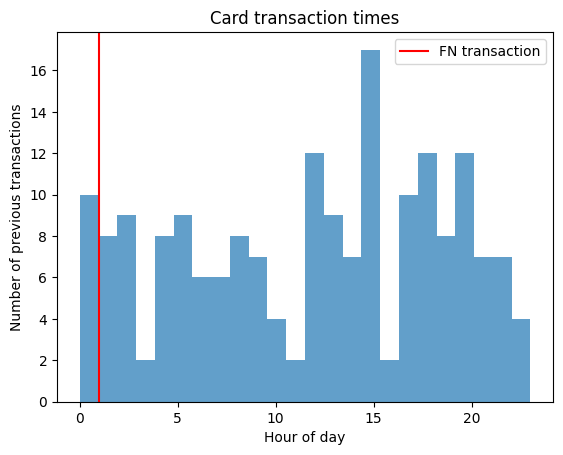

In [7]:
plt.hist(card_tx["hour"], bins=24, alpha=0.7)
plt.axvline(fn_tx["hour"], color="red", label="FN transaction")
plt.xlabel("Hour of day")
plt.ylabel("Number of previous transactions")
plt.title("Card transaction times")
plt.legend()
plt.show()


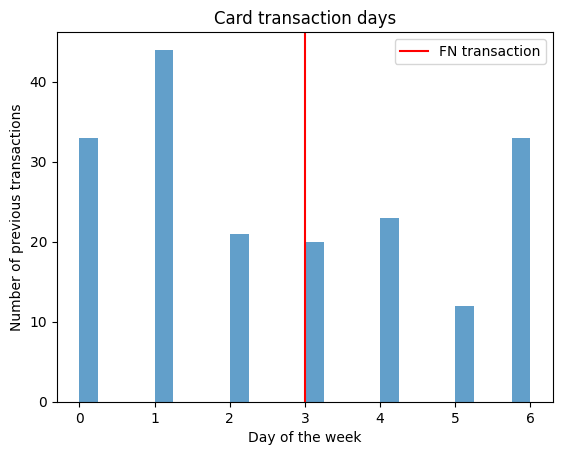

In [8]:
plt.hist(card_tx["dayofweek"], bins=24, alpha=0.7)
plt.axvline(fn_tx["dayofweek"], color="red", label="FN transaction")
plt.xlabel("Day of the week")
plt.ylabel("Number of previous transactions")
plt.title("Card transaction days")
plt.legend()
plt.show()
